In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import ipywidgets as wd

In [2]:
from IPython.display import YouTubeVideo
video_out = wd.Output()
display(video_out)
with video_out:
    display(YouTubeVideo('JEYLfIVvR9I'))

Output()

In [3]:
def show(img: np.ndarray, figsize=(12, 12)):
    fig, ax = plt.subplots(figsize=figsize)
    visu = img
    ax.imshow(visu, cmap='gray', clim=(0, 1))
    plt.axis('off')
    plt.show()
    
    
def load(path: str, reshape=None):
    img = cv2.imread(str(path))
    if reshape:
        img = cv2.resize(img, reshape) # , interpolation = cv2.INTER_AREA)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255.

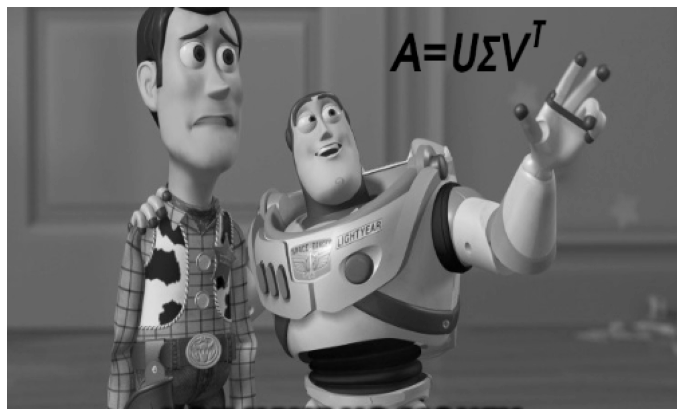

In [4]:
img = load('media/sheriff.jpg', reshape=(500, 300))
show(img, figsize=(12, 12))

In [5]:
# SVD
u, s, vh = np.linalg.svd(img, full_matrices=False)
# shapes: (h, h), (h), (h, w)
u.shape, s.shape, vh.shape

((300, 300), (300,), (300, 500))

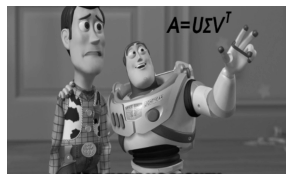

In [6]:
# quick check, that we got a correct decomposition
reconstructed_image = u@np.diag(s)@vh
show(reconstructed_image, figsize=(5, 5))

In [7]:
def composition(u, s, vh, n):
    """ 
        Reconstruct an image using the following sub-matrices. (reduce size, lower quality) 
    """
    lambda_n = s[0:n]  # fist n singular values
    u_n = u[:, 0:n]    # first n columns of shape (h, n)
    vh_n = vh[0:n, :]  # first n rows of shape (n, w)
    return u_n @ np.diag(lambda_n) @ vh_n

In [8]:
# widget controls
n = 10
sld = wd.IntSlider(value=n, min=0, max=100, step=1, description='n:', continuous_update=False)
out = wd.Output()
composition(u, s, vh, 100)

def update_sld_show(value):
    global n, u, s, vh, out
    n = value['new']
    with out:
        out.clear_output(True)
        img_ = composition(u, s, vh, n)
        show(img_)

        
sld.observe(update_sld_show, names='value')
update_sld_show(dict(new=n))

In [9]:
display(sld, out)

IntSlider(value=10, continuous_update=False, description='n:')

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 864x864 with 1 Axes>', 'i…